In [1]:
import pandas as pd
from pyarrow import csv
import numpy as np
import networkx as nx
from functools import reduce
#import sweetviz as sv
import matplotlib.pyplot as plt

import timeit
import time

In [2]:
trainData_file=csv.read_csv('Data/trainData_final_nolinks_day26.csv')
training_df2 =  trainData_file.to_pandas()
training_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp000566,0.000993,0.106979,1.570389,140924,5206.4,Missing,4,3197,17.0,243335.0,13949.0,126359.117647,22656.0,1248.0,11796.705882,0.0,0.0,0.0
1,ActiveDirectory,Comp001022,0.001191,0.008405,1.494416,221452,5208.0,Missing,4,3197,3.0,1.0,1.0,1.000000,96.0,96.0,96.000000,0.0,0.0,0.0
2,ActiveDirectory,Comp002524,0.002281,0.009277,2.840069,412706,5216.8,Missing,9,3197,1.0,1.0,1.0,1.000000,96.0,96.0,96.000000,0.0,0.0,0.0
3,ActiveDirectory,Comp003688,0.001786,0.006173,2.173534,281848,5212.8,Missing,2,3197,1.0,26.0,26.0,26.000000,0.0,0.0,0.000000,2287.0,2287.0,2287.0
4,ActiveDirectory,Comp005295,0.002776,0.363384,5.377657,483168,5220.8,Missing,13,3197,2.0,984.0,86.0,535.000000,0.0,0.0,0.000000,2471.0,2411.0,2441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366347,Comp273343,Comp017911,0.000000,0.000000,0.000000,252,1732.8,NoLink,9,28,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
366348,Comp852778,Comp987487,0.078947,0.000351,0.331175,420,2601.6,NoLink,2,19,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
366349,Comp010016,Comp284265,0.050000,0.000088,0.107098,38,2600.0,NoLink,0,19,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
366350,Comp776638,Comp428151,0.384615,0.002573,1.186201,323,2607.2,NoLink,4,15,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
testData_file=csv.read_csv('Data/testData_final_nolinks_day26.csv')
testing_df2 =  testData_file.to_pandas()
testing_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp003448,0.001699,0.020821,1.893824,172935,5247.6,Missing,5,2025,1.0,28.0,28.0,28.0,0.0,0.0,0.0,2255.0,2255.0,2255.0
1,ActiveDirectory,Comp004355,0.001092,0.001481,1.029108,115290,5243.6,Missing,1,2025,2.0,1.0,1.0,1.0,60.0,60.0,60.0,0.0,0.0,0.0
2,ActiveDirectory,Comp009410,0.002063,0.038536,2.493647,181170,5250.0,Missing,3,2025,1.0,4.0,4.0,4.0,640.0,640.0,640.0,0.0,0.0,0.0
3,ActiveDirectory,Comp014675,0.001578,0.002518,1.511377,123525,5246.8,Missing,1,2025,3.0,29642.0,16122.0,22432.0,1740.0,1020.0,1280.0,0.0,0.0,0.0
4,ActiveDirectory,Comp014941,0.001092,0.003264,1.079179,98820,5243.6,Missing,1,2025,1.0,1.0,1.0,1.0,309.0,309.0,309.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243997,Comp050085,Comp972195,0.000000,0.000000,0.000000,0,0.0,NoLink,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243998,Comp114983,Comp372203,0.333333,0.000199,0.117335,3,2619.0,NoLink,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243999,Comp639223,Comp158414,0.000000,0.000000,0.000000,68,1309.1,NoLink,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244000,Comp155068,Comp382098,0.391304,0.002147,1.061073,256,2625.4,NoLink,0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_test, y_test = testing_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment',  'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], testing_df2['Label']


In [5]:
len(training_df2[training_df2["Label"]=="Continuing"])


153676

In [6]:
len(training_df2[training_df2["Label"]=="Missing"])


156371

In [7]:
len(training_df2[training_df2["Label"]=="New"])

36309

In [8]:
len(training_df2[training_df2["Label"]=="NoLink"])

19996

In [9]:
len(testing_df2[testing_df2["Label"]=="Continuing"])

145250

In [10]:
len(testing_df2[testing_df2["Label"]=="Missing"])

44735

In [11]:
len(testing_df2[testing_df2["Label"]=="New"])

34020

In [12]:
TrainTest=[]
TrainTest.append(training_df2)
TrainTest.append(testing_df2)

In [13]:
trainData=training_df2.copy()

In [14]:
train_Cont_df=trainData[trainData["Label"]=="Continuing"]
train_Miss_df=trainData[trainData["Label"]=="Missing"]
train_New_df=trainData[trainData["Label"]=="New"]
train_NoLink_df=trainData[trainData["Label"]=="NoLink"]

In [15]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLink']
#report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
#print(report_2)

In [16]:
dfc=train_Cont_df.sample(n = 19000)
dfm=train_Miss_df.sample(n = 19000)
dfn=train_New_df.sample(n = 19000)
dfnl=train_NoLink_df.sample(n = 19000)

In [17]:
trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']


In [18]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
rf_scores = rf_model.predict_proba(X_test)
rf_new_scores=rf_scores[:, 3]

In [19]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


AB_model = AdaBoostClassifier(n_estimators=100, random_state=0)
AB_model.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
AB_scores = AB_model.predict_proba(X_test)
AB_new_scores=AB_scores[:, 3]

In [20]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
gnb_scores = gnb_model.predict_proba(X_test)
gnb_new_scores=gnb_scores[:, 3]

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

XGB_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
XGB_model.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
XGB_scores = XGB_model.predict_proba(X_test)
XGB_new_scores=XGB_scores[:, 3]

In [22]:
#import svm model
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV

#LinearSVC  = make_pipeline(StandardScaler(),LinearSVC(dual=False, random_state=0, tol=1e-5))
#LinearSVC.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
#SVC_scores = LinearSVC.predict_proba(X_test)
#SVC_new_scores=SVC_scores[:, 2]

linear_svc = LinearSVC()
linear_svc.fit(X_train_3, y_train_3)
calibrated_svc = CalibratedClassifierCV(linear_svc, method='sigmoid', cv='prefit')
calibrated_svc.fit(X_train_3, y_train_3)

# Predict probabilities for the positive class (index 1)
SVC_scores = calibrated_svc.predict_proba(X_test)
SVC_new_scores=SVC_scores[:, 3]


/home/asha/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
#import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
LR_scores = LogReg.predict_proba(X_test)
LR_new_scores=LR_scores[:, 3]

/home/asha/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#import MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

MLP_clf  = MLPClassifier(random_state=1, max_iter=300)
MLP_clf.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
MLP_scores = MLP_clf.predict_proba(X_test)
MLP_new_scores=MLP_scores[:, 3]

In [25]:
print(set(y_test))

{'Continuing', 'NoLink', 'New', 'Missing'}


In [26]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 244002 entries, 0 to 244001
Series name: Label
Non-Null Count   Dtype 
--------------   ----- 
244002 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [27]:
# Assuming y_test is a pandas Series containing class labels
y_test_binary = (y_test == 'NoLink').astype(int)

In [28]:

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test_binary, rf_new_scores)
rf_roc_auc = auc(rf_fpr, rf_tpr)

#Adaboost
AB_fpr, AB_tpr, _ = roc_curve(y_test_binary, AB_new_scores)
AB_roc_auc = auc(AB_fpr, AB_tpr)

#Gradient Boosting Classifier
gnb_fpr, gnb_tpr, _ = roc_curve(y_test_binary, gnb_new_scores)
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

#Linear SVC
svc_fpr, svc_tpr, _ = roc_curve(y_test_binary, SVC_new_scores)
svc_roc_auc = auc(svc_fpr, svc_tpr)

#Logistic Regression
LR_fpr, LR_tpr, _ = roc_curve(y_test_binary, LR_new_scores)
LR_roc_auc = auc(LR_fpr, LR_tpr)

#MLP Classifier
MLP_fpr, MLP_tpr, _ = roc_curve(y_test_binary, MLP_new_scores)
MLP_roc_auc = auc(MLP_fpr, MLP_tpr)

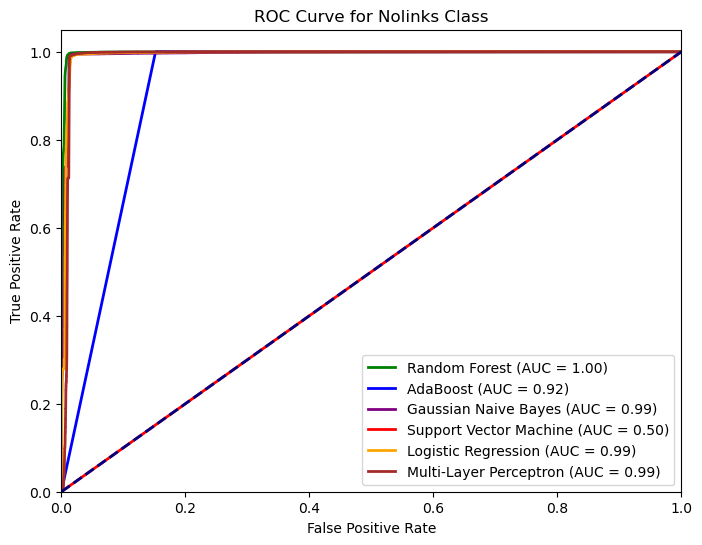

In [29]:
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model with unique colors and labels
plt.plot(rf_fpr, rf_tpr, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(AB_fpr, AB_tpr, color='blue', lw=2, label='AdaBoost (AUC = %0.2f)' % AB_roc_auc)
plt.plot(gnb_fpr, gnb_tpr, color='purple', lw=2, label='Gaussian Naive Bayes (AUC = %0.2f)' % gnb_roc_auc)
plt.plot(svc_fpr, svc_tpr, color='red', lw=2, label='Support Vector Machine (AUC = %0.2f)' % svc_roc_auc)
plt.plot(LR_fpr, LR_tpr, color='orange', lw=2, label='Logistic Regression (AUC = %0.2f)' % LR_roc_auc)
plt.plot(MLP_fpr, MLP_tpr, color='brown', lw=2, label='Multi-Layer Perceptron (AUC = %0.2f)' % MLP_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Nolinks Class')
plt.legend(loc='lower right')
plt.show()

